In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import collections
from collections import Counter

In [2]:
from konlpy.tag import Mecab

In [3]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [4]:
ndf1 = pd.read_csv('./윤석열/윤석열_2022-02-09~2022-02-16_result2.csv',encoding='utf-8')
ndf2 = pd.read_csv('./윤석열/윤석열_2022-02-16~2022-02-23_result2.csv',encoding='utf-8')
ndf3 = pd.read_csv('./윤석열/윤석열_2022-02-23~2022-03-02_result2.csv',encoding='utf-8')
ndf4 = pd.read_csv('./윤석열/윤석열_2022-03-02~2022-03-09_result2.csv',encoding='utf-8')

In [5]:
ndfs = [ndf1, ndf2, ndf3, ndf4]

In [6]:
# Preprocessing code with Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
mecab = Mecab(r"C:/mecab/mecab-ko-dic") # Mecab User Dic Path

def preprocessing_mecab(readData):
    
    #### Clean text
    #sentence = CleanText(readData)
    
    #### Tokenize
    morphs = mecab.pos(readData)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [7]:
m_tokenized1 = ndf1['text'].apply(lambda x: preprocessing_mecab(x))
m_tokenized2 = ndf2['text'].apply(lambda x: preprocessing_mecab(x))
m_tokenized3 = ndf3['text'].apply(lambda x: preprocessing_mecab(x))
m_tokenized4 = ndf4['text'].apply(lambda x: preprocessing_mecab(x))

In [13]:
m_tokenized = [m_tokenized1, m_tokenized2, m_tokenized3, m_tokenized4]

In [14]:
stopwords1 = ['한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거', ]

In [18]:
def weekly_distribution(m_tokenized):
    n_corpus = [] 
    for t in m_tokenized:
        for j in t:
            if j not in stopwords1:
                n_corpus.append(j) #mecab에서 명사 추출

    count = collections.Counter(n_corpus) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:50]: 
        x.append(word) 
        y.append(count)
    #plt.rc('font',family='NanumGothic.ttf')
    plt.rcParams['font.family'] = "NanumGothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    sns.barplot(x=y,y=x)

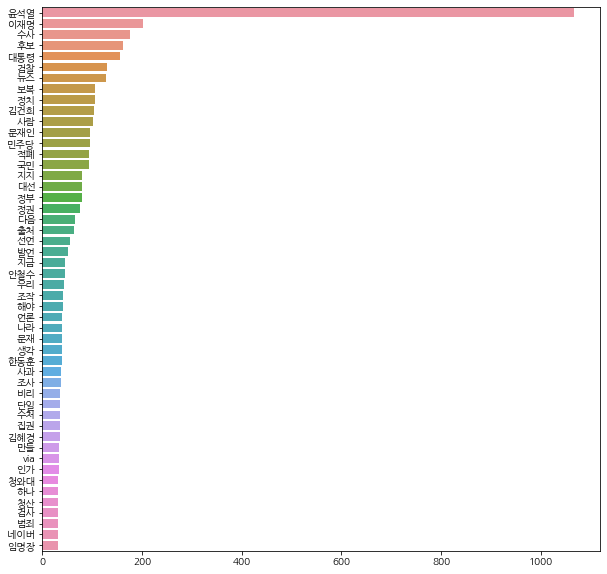

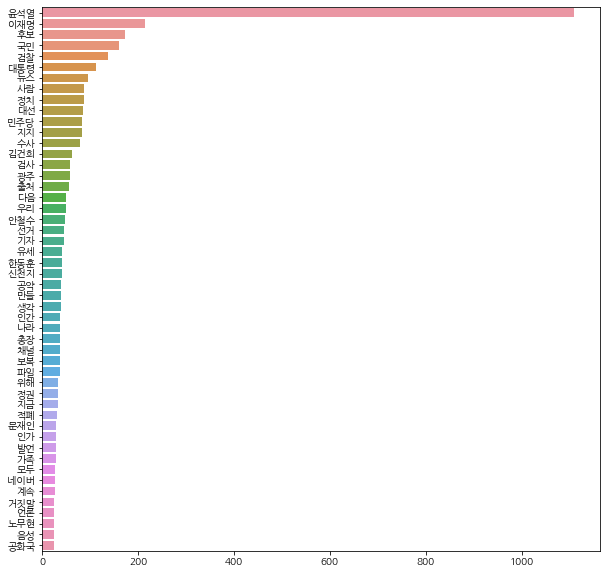

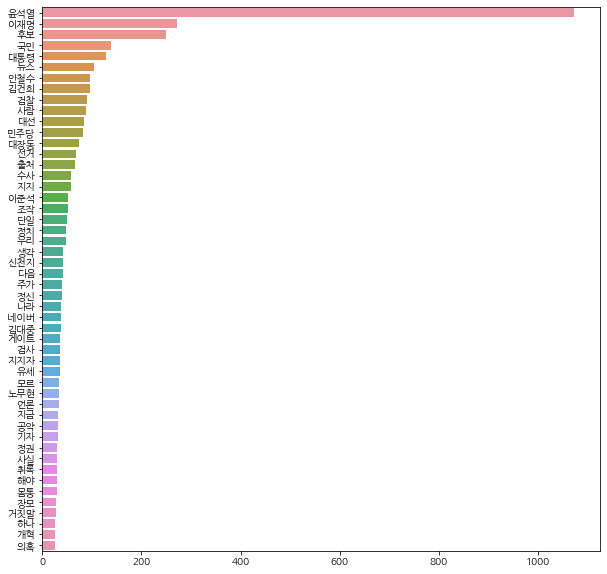

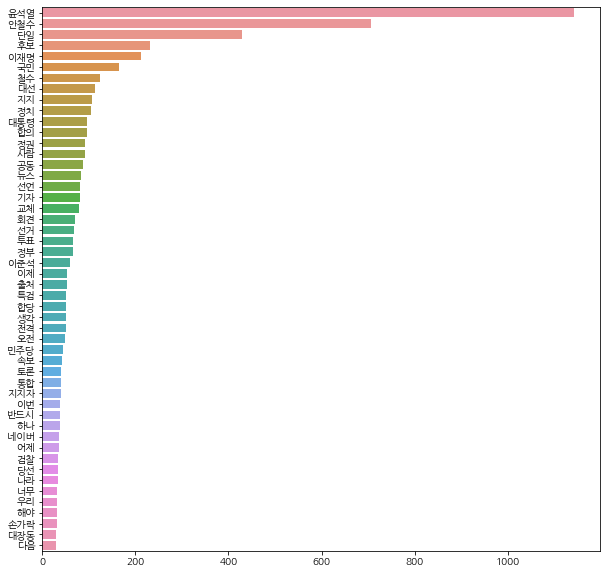

In [19]:
for i in m_tokenized:
    weekly_distribution(i)